In [2]:
import pandas as pd
import networkx as nx

In [3]:
duet_stitch = pd.read_csv('duet_stitch.csv')

In [4]:
likes = pd.read_csv('liked_videos.csv', index_col=False)

In [6]:
follows = pd.read_csv('../shared-folder-gald/data/follow-link.csv')

In [8]:
videos = pd.read_json('../shared-folder-gald/data/video-creators.json')

In [9]:
videos

,username,video_description,region_code,share_count,hashtag_names,id,like_count,music_id,view_count,voice_to_text,comment_count,create_time,cluster,cluster-label,playlist_id,effect_ids
0,the.animal.holocaust,Replying to @ov10bronco #dominicizrealmyers #v...,US,4,"[vegan, yes, bbq, meat, carnivore, govegan, ve...",7274212644502998314,40,7.274213e+18,1054,"You say, why torture yourself? Because all we ...",181.0,2023-09-02 13:00:37,10,Healthy Cooking,NaN,NaN
1,bakemehealthylove,How to make: 1. Get Your Mix: Grab our Oatmeal...,US,4,"[wafflemix, waffleday, plantbased, strawberryw...",7271102720256314666,65,7.217848e+18,1087,Happy National Waffle Day we're celebrating wi...,0.0,2023-08-25 03:52:14,10,Healthy Cooking,NaN,NaN
2,livinapril7,Looking for a healthy #plantbased #protein pac...,US,0,"[food, healthy, lunch, health, salad, tasty, o...",7272105378920353054,2,6.705026e+18,271,NaN,0.0,2023-08-27 20:43:20,10,Healthy Cooking,NaN,NaN
3,goodvibessocietyofficial,"Pull up to Sprouts, grab those good vibes bott...",US,0,"[drinks, weekendvibes, sprouts, plantbased, su...",7271427012529524011,31,7.271427e+18,372,NaN,2.0,2023-08-26 00:50:41,-1,Outliers,NaN,NaN
4,settonfarms,"At Setton Farms, we are committed to sustainab...",US,1,"[nuts, recipe, farm, farmlife, harvest, pistac...",7273980908565433646,120,7.133309e+18,7031,NaN,2.0,2023-09-01 22:01:08,8,Gardening,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578937,basicbxtchthrift,So excited for a weekend away!!! #fyp #stylein...,US,3,"[savannahga, fyp, savannahbananas, thrifted, s...",7273638102931983659,176,7.263322e+18,5031,NaN,10.0,2023-08-31 23:50:54,13,Lifestyle,NaN,NaN
578938,ynotsissy,I love the gorgeous Ashley dress! #lovewhatyou...,AU,0,"[bodypositivity, fyp, lovewhatyoudo, centralco...",7264064078270713089,6,7.264064e+18,390,NaN,0.0,2023-08-06 04:38:42,7,Fashion,NaN,NaN
578939,javert315,Lovely resin fairy wing earrings finished! The...,US,3,"[resinjewelry, uvresin, fairycore, uvresinjewe...",7273154953957428510,19,6.711176e+18,479,NaN,2.0,2023-08-30 16:36:34,10,Healthy Cooking,NaN,[7548118]
578940,ynotsissy,Designing the prints and dresses in small batc...,AU,0,"[foryou, lovewhatyoudo, centralcoast, slowfash...",7271494707501370632,2,7.271495e+18,366,NaN,0.0,2023-08-26 05:13:19,7,Fashion,NaN,NaN


In [10]:
#Remove rows where the creator makes stitch/duet with themselves
filtered_duet_stitch = duet_stitch[duet_stitch['username'] != duet_stitch['creator']]

In [13]:
video_max_like = max(videos['like_count'])

8858086

Creating bipartite network where: Users are connected to videos they liked.

For now each edge has attributes:

creator: The video's creator
weight: A computed value based on weight_likes and weight_duets

In [ ]:
# G = nx.Graph()

# for _, row in likes.iterrows():
#     G.add_edge(row['username'], row['video_id'], creator=row['creator'], weight = (weight_likes/weight_likes+weight_duets))


NameError: name 'weight_likes' is not defined

In [16]:
G.remove_edges_from(nx.selfloop_edges(G))

If the user duet/stitched the video -> add the normalized weight

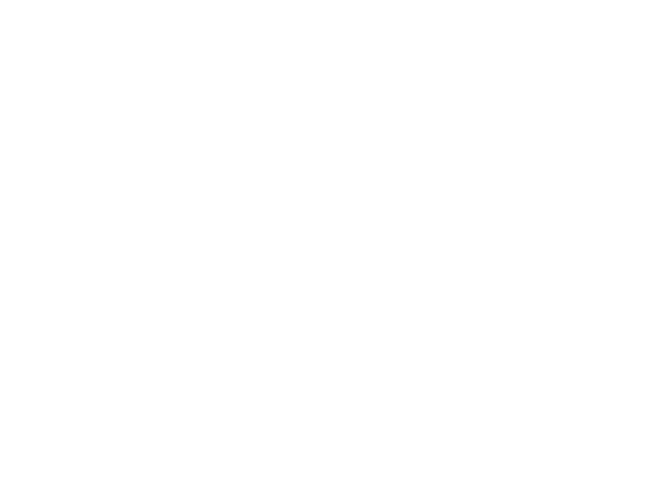

In [17]:
nx.draw(G, pos=nx.spring_layout(G))

In [52]:
# weight - nr of follows 
follows = pd.read_csv('../shared-folder-gald/data/follow-link.csv', index_col=0)
follows

,source,target
0,designs_from_time,cosmicsummit
1,cosmicsummit,conspiracyhubog
2,conspiracyhubog,cosmicsummit
3,guildworld,venetialamanna
4,guildworld,i_d
...,...,...
161886,javert315,ksgarner
161887,javert315,bethfrombklyn
161888,ynotsissy,melmelbourne_
161889,basicbxtchthrift,brooklynkarasack


In [26]:
likes

,username,video_id,creator
0,bbcnews,7421594306210696481,taliamaizels
1,bbcnews,7454572661281262880,bbcnews
2,bbcnews,7444593083552976161,bbcnews
3,bbcnews,7381432178942414112,mahmood
4,bbcnews,7467351767571778858,msnbc
...,...,...,...
17546,maikengreimel,7467861092786638102,janes.wonda
17547,maikengreimel,7465696976609266966,desperatebookwives
17548,maikengreimel,7466856348878212374,ninagreimel
17549,maikengreimel,7451570066488921366,sandrasbooks


In [28]:
#like count per video
likes_per_vid = likes['video_id'].value_counts()
likes_per_vid

video_id
7473627317412072735    6
7473259312601746731    5
7473363399443959086    5
7473666243644509486    4
7472435020305632534    4
                      ..
7473173573713153323    1
7473538165886782751    1
7473215826645028142    1
7473544035727084831    1
7429042977038732587    1
Name: count, Length: 17259, dtype: int64

In [29]:
#number of total videos 
unique_videos = likes['video_id'].nunique()
print(unique_videos)

17259


In [32]:

video_max_like = max(videos['like_count'])

video_max_like

8858086

In [61]:

users_df = pd.unique(follows.values.ravel())

# Convert the result into a list
users_list = users_df.tolist()

# Display the list
creators_count = len(users_list)
print(creators_count)

13867


In [59]:
creator_followers = follows['target'].value_counts().reset_index()
creator_followers.columns = ['creator', 'count']

print(creator_followers)

                 creator  count
0           alexisnikole    974
1             mndiaye_97    834
2          texasbeeworks    765
3                billnye    713
4                che.jim    679
...                  ...    ...
10168       yanglala.apu      1
10169      the_bullshark      1
10170         amber_rae7      1
10171  alyssa.wanders406      1
10172        saviocooper      1

[10173 rows x 2 columns]


In [44]:
#maximum followers count you can get in that community
followers_counts = creator_followers['count'].max()
followers_counts

974

In [ ]:
#Option 1 one normalised by maximum follow count of the most popular creator

#Relative to the dataset: This method reflects how each creator compares to the most popular creator in the dataset. 
# It’s useful when you're comparing creators within the sample.

creator_followers['normalized_weight'] = creator_followers['count'] / followers_counts

# Create a new DataFrame with creator and their corresponding normalized weight
normalized_df = creator_followers[['creator', 'normalized_weight']]

# Display the new DataFrame
print(normalized_df)


                 creator  normalized_weight
0           alexisnikole           1.000000
1             mndiaye_97           0.856263
2          texasbeeworks           0.785421
3                billnye           0.732033
4                che.jim           0.697125
...                  ...                ...
10168       yanglala.apu           0.001027
10169      the_bullshark           0.001027
10170         amber_rae7           0.001027
10171  alyssa.wanders406           0.001027
10172        saviocooper           0.001027

[10173 rows x 2 columns]


In [62]:
#Option 2: normalised followers weight based on all possible users in network 

creator_followers['normalized_weight'] = creator_followers['count'] / creators_count

# Create a new DataFrame with creator and their corresponding normalized weight
normalized_df = creator_followers[['creator', 'normalized_weight']]

# Display the new DataFrame
print(normalized_df)


                 creator  normalized_weight
0           alexisnikole           0.070239
1             mndiaye_97           0.060143
2          texasbeeworks           0.055167
3                billnye           0.051417
4                che.jim           0.048965
...                  ...                ...
10168       yanglala.apu           0.000072
10169      the_bullshark           0.000072
10170         amber_rae7           0.000072
10171  alyssa.wanders406           0.000072
10172        saviocooper           0.000072

[10173 rows x 2 columns]
